In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import defaultdict
import logging

logging.basicConfig(level=logging.INFO)

In [ ]:
data = pd.read_csv('salary-prediction-and-analysis/data/survey_results_public.csv')
schema = pd.read_csv('salary-prediction-and-analysis/data/survey_results_schema.csv')
data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,...,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,...,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Several times,Several times,Once or twice,Somewhat agree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Satisfied,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,I have created a CV or Developer Story on Stac...,8.0,Desktop; iOS browser; iOS app; Android browser...,Several times,Several times,Once or twice,Once or twice,Once or twice,Haven't done at all,Several times,At least once each week,Disagree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,20 or more years,20 or more years,NaN,Other,NaN,NaN,NaN,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Agree,Somewhat agree,Disagree,Disagree,Agree,...,Very satisfied,A lot of influence,Some influence,Some influence,Some influence,A lot of influence,Some influence,Some i

In [ ]:
data.shape

(19102, 154)

## Analyzing data for better understanding of the data

### Which colummns have missing values?

In [ ]:
# columns with null values
null_val_col = [col for col in data.columns if data[col].isnull().any()]
null_val_col

['MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobTech',
 'AssessJobProjects',
 'AssessJobCompensation',
 'AssessJobOffice',
 'AssessJobCommute',
 'AssessJobRemote',
 '

### Which columns don't have missing values?

In [ ]:
# columns without null values
cols = data.columns[data.isnull().mean()==0]
cols

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation'],
      dtype='object')

### Which columns have most missing values, more than 75% ?

In [ ]:
most_missing_val_cols = data.columns[data.isnull().mean() > 0.75]
most_missing_val_cols

Index(['YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe',
       'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'TimeAfterBootcamp',
       'ExpectedSalary'],
      dtype='object')

### How many professional status values are present in the dataset?

In [ ]:
status_values = data['Professional'].value_counts()
status_values

Professional developer                                  13774
Student                                                  2821
Professional non-developer who sometimes writes code     1782
None of these                                             368
Used to be a professional developer                       357
Name: Professional, dtype: int64

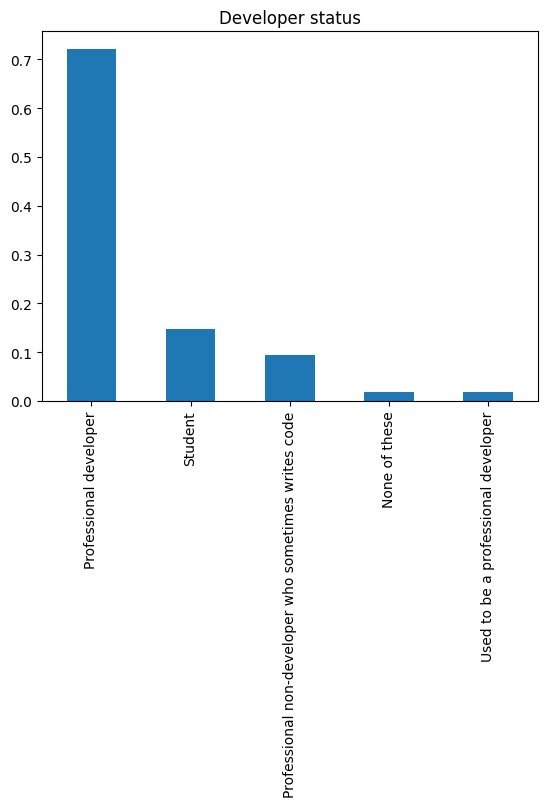

In [ ]:
# plot the status values
(status_values/data.shape[0]).plot(kind="bar")
plt.title('Developer status');

Around 70% of the developers in the dataset are Professional Developers

### How many Formal Education status values are present in the dataset?

In [ ]:
formal_edu_values = data['FormalEducation'].value_counts()
formal_edu_values

Bachelor's degree                                                    8099
Master's degree                                                      4143
Some college/university study without earning a bachelor's degree    2869
Secondary school                                                     2227
Doctoral degree                                                       551
I prefer not to answer                                                409
Primary/elementary school                                             404
Professional degree                                                   255
I never completed any formal education                                145
Name: FormalEducation, dtype: int64

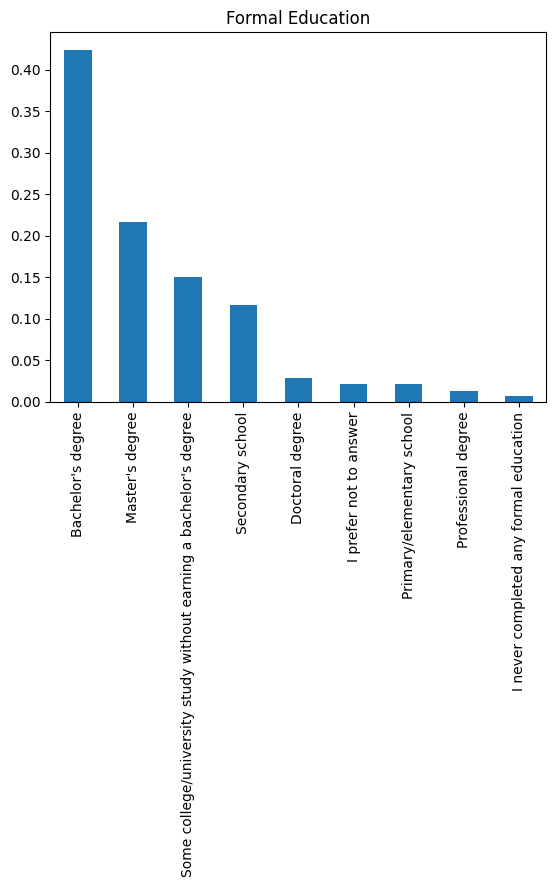

In [ ]:
# plot the data  
(formal_edu_values/data.shape[0]).plot(kind='bar')
plt.title('Formal Education');

Around 45% of the developers completed and have Bachelor's degree


### How many countries are present in the data and how many developers are belong to a country?

In [ ]:
country_values = data['Country'].value_counts()
country_values

United States     4364
India             1557
United Kingdom    1424
Germany           1337
Canada             874
                  ... 
Lesotho              1
Bhutan               1
Cayman Islands       1
Bahamas              1
Burkina Faso         1
Name: Country, Length: 165, dtype: int64

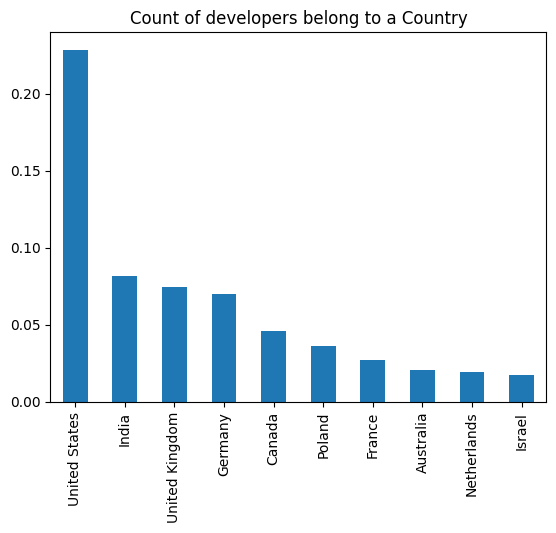

In [ ]:
# plot countries 
(country_values[:10]/data.shape[0]).plot(kind='bar')
plt.title('Count of developers belong to a Country');

# Analyzing further for more info

In [ ]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


Create a function to return description of the column from the schema file

In [ ]:
def get_description(column_name):
    """
    INPUT : column_name (name of the column, whose description you want to know)
    OUTPUT : description of the input column name
    """
    return list(schema[schema['Column'] == column_name]['Question'])[0]

let's get the description of the column of interest which is **CousinEducation**

In [ ]:
get_description('CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

### How many status values for CousinEduaction column we have

In [ ]:
ce_values = data['CousinEducation'].value_counts().reset_index()
ce_values

,index,CousinEducation
0,Take online courses; Buy books and work throug...,192
1,None of these,167
2,Take online courses,158
3,Take online courses; Part-time/evening courses...,140
4,Take online courses; Bootcamp; Part-time/eveni...,132
...,...,...
596,Return to college; Part-time/evening courses; ...,1
597,Master's degree; Participate in online coding ...,1
598,Master's degree; Contribute to open source; Pa...,1
599,Participate in hackathons; Participate in onli...,1


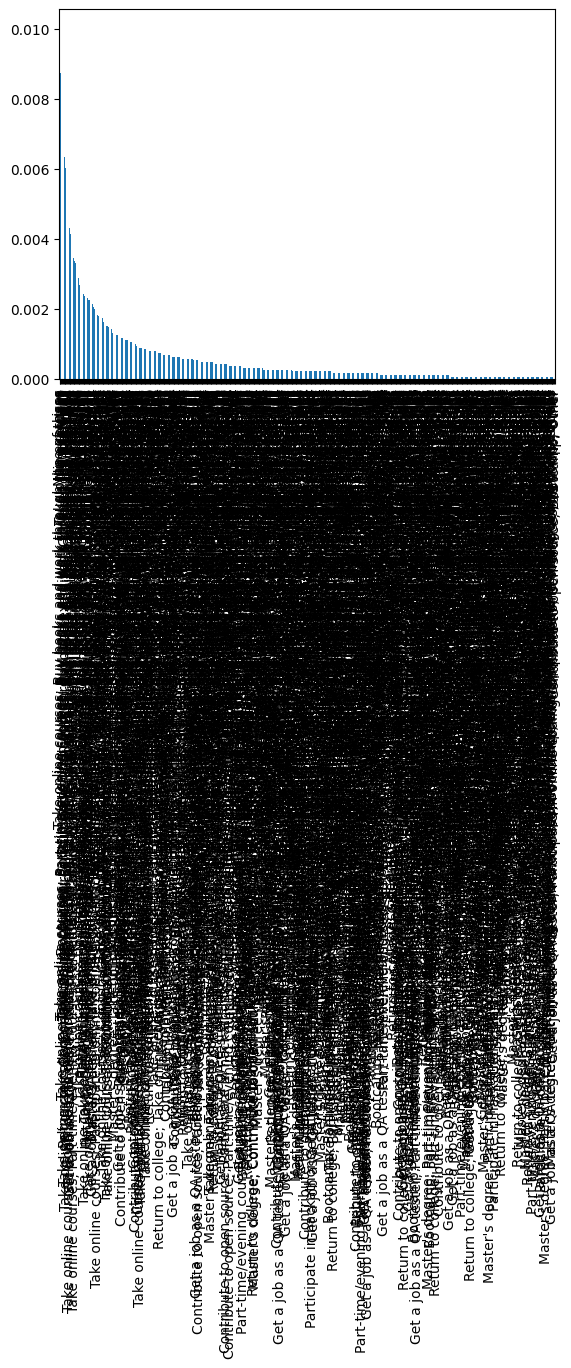

In [ ]:
(ce_values/data.shape[0]).plot(kind='bar');

let's clean the **CousinEducation** Column

In [ ]:
def total_count(data, col1, col2, ed_types):
    new_df = defaultdict(int)
    # loop through list of education types
    for val in ed_types:
        # loop through rows
        for idx in range(data.shape[0]):
            # if the education type is in row add 1
            if val in data[col1][idx]:
                new_df[val] += int(data[col2][idx])
    
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [ ]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 'Contribute to open source', "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]


study = data['CousinEducation'].value_counts().reset_index()
study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)

new_df = total_count(study, 'method', 'count', possible_vals)
new_df

,method,count
0,Take online courses,4440
1,Buy books and work through the exercises,3422
5,Contribute to open source,2318
3,Part-time/evening courses,2181
7,Bootcamp,1569
6,Conferences/meet-ups,1538
4,Return to college,1469
8,Get a job as a QA tester,1036
9,Participate in online coding competitions,999
10,Master's degree,772


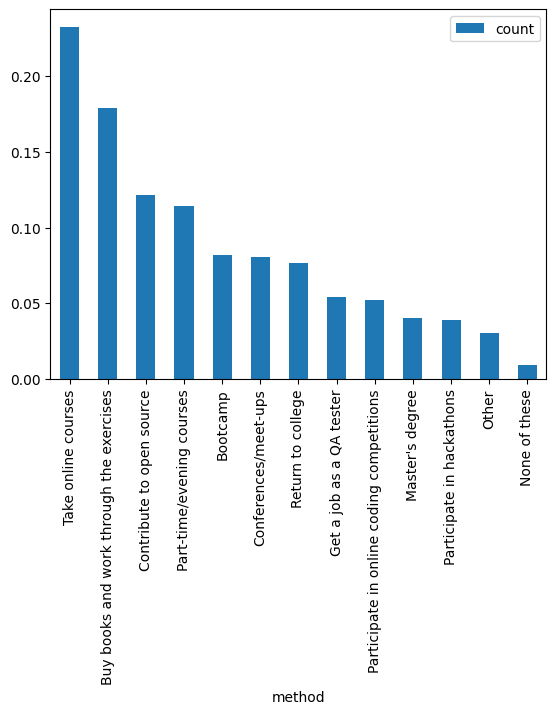

In [ ]:
new_df.set_index('method', inplace=True)
(new_df/data.shape[0]).plot(kind='bar')